# **AUTHORS:**
* David Kareem
* Abdelrahman Nawara
* Janna El-Kaffas

# **INTRODUCTION**

## Describing the Dataset

The dataset we chose is the “Hospital Patient Dataset”, which contains 1000 rows and 10 columns.
*   Quantitative Data: Age, Recovery Time, Treatment Cost
*   Categorical Data: Gender, Condition, Treatment, Exercise habits, Smoking habits, Drinking habits
* We have chosen to disregard 'Patient ID' as it has no numerical nor qualitative meaning

## Our Data Analysis Questions

We aim to answer the following overarching research question:


---


***What are the factors that have the most significant impact on the recovery time of the patients?***

---

We have decided to divide our analyses into 3 sections to answer this large question in 3 parts, by analyzing:

1.   Demographic Factors that affect recovery time
2.   Lifestyle Habits that affect recovery time
3.   The effect of a patient's condition & treatment type

#**Importing the Dataset and the necessary libraries for analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-DSCI1412-Spring2024/main/project/hospital_patients.csv")
df.head()

,PatientID,Age,Gender,Condition,Treatment,TreatmentCost,RecoveryTime,Smoking,Drinking,Exercise
0,1,48,Male,Diabetes,Medication,948.86,31,Current,Current,Low
1,2,32,Male,Cold,Warm Fluids,128.04,5,Never,Former,High
2,3,18,Male,Cold,Warm Fluids,243.91,10,Current,Former,Low
3,4,38,Female,Cold,Warm Fluids,84.85,7,Never,Never,Moderate
4,5,49,Male,Injury,Surgery,166.65,27,Former,Never,Moderate


In [ ]:
df.shape

(1000, 10)

#**Data Cleaning & Pre-processing**

## Brief Methodology:

Tools used for data analysis:


---
Data Visualization tools:
* Box plots
* Bar plots
* Scatter plots
---
Statistical tools:
* Correlation coefficients
* T-tests
* ANOVA tests

## Removing Patient ID

We decided to remove the column 'Patient ID' from the data set as it would have no numeric or qualitative meaning in our analyses:

In [ ]:
df = df.drop(columns = ['PatientID'])
df.shape

(1000, 9)

Now, only 9 columns, therefore PatientID has been removed

## Erroneous Data ##

In [ ]:
min(df['RecoveryTime'])

0

In [ ]:
df[df['RecoveryTime']==0] #Filtering data frame to display observations with recovery time of 0

,Age,Gender,Condition,Treatment,TreatmentCost,RecoveryTime,Smoking,Drinking,Exercise
208,21,Female,Fever,Medication,265.51,0,Never,Current,High
467,54,Female,Fever,Rest,149.41,0,Never,Current,High


*Two patients had a recovery time of 0, which is unexpected and does not make sense. Perhaps the patients were in the hospital and left on the day they arrived?*

**However, treatment costs are unusually high (upon comparing with other treatment costs for different conditions) even when considering this as a plausible scenario, so we will choose to cut these out.**

*We have therefore managed to use the variable treatment cost to our advantage, despite not exploring it*

In [ ]:
df = df[~(df['RecoveryTime']==0)] #Removing observations with a recovery time of 0 days
df.shape

(998, 9)

From 1000 rows to 998, two rows have been removed, therefore df has now been updated

## Checking for duplicates / NAs

In [ ]:
df.drop_duplicates(inplace=True) #Removes duplicate rows
df.shape

(998, 9)

*Number of rows remains unchanged, therefore there are no duplicate rows*

In [ ]:
df.isna().value_counts() #Checking for NAs

Age    Gender  Condition  Treatment  TreatmentCost  RecoveryTime  Smoking  Drinking  Exercise
False  False   False      False      False          False         False    False     False       998
Name: count, dtype: int64

All false, therefore there were no missing values in the whole data set

## Patients by condition

As 'Condition' is a key variable in our analyses, we will create filtered data frames by condition, ready for analysis:

In [ ]:
heart_disease_patients = df[df['Condition']=='Heart Disease']
injury_patients = df[df['Condition']=='Injury']
diabetes_patients = df[df['Condition']=='Diabetes']
fever_patients = df[df['Condition']=='Fever']
cold_patients = df[df['Condition']=='Cold']
arthritis_patients = df[df['Condition']=='Arthritis']

# **Initial Exploratory Data Analysis**

## Descriptive Statistics

In [ ]:
summary = df.describe() #Generates descriptive statistics
summary

,Age,TreatmentCost,RecoveryTime
count,998.000000,998.000000,998.000000
mean,46.806613,551.510291,25.849699
std,17.565115,1210.892190,22.507448
min,18.000000,10.060000,1.000000
25%,32.000000,114.062500,9.000000
50%,48.000000,249.750000,18.000000
75%,61.000000,554.147500,38.000000
max,90.000000,28060.930000,130.000000


## Correlations

In [ ]:
correlations = df.corr(numeric_only = True) #Computes correlations coefficients. 'numeric_only' prevents an error in trying to correlate qualitative data
correlations

,Age,TreatmentCost,RecoveryTime
Age,1.000000,0.183765,0.508192
TreatmentCost,0.183765,1.000000,0.275240
RecoveryTime,0.508192,0.275240,1.000000


Evidently, Age and Recovery Time are closely correlated, this relationship will be explored further in our analyses

**Key Takeaways:**
---
* **Mean Age**: 46.8
* **Mean Recovery Time**: 25.8
* **75th percentile of Age**: 61

Based on these statistics:

For our analysis, we have chosen to classify 'old patients' as those with an age > 60

**This way, we are observing a sub-population that is reasonably large**

In [ ]:
old_patients = df[df['Age']>60] #Extracting patients older than 60
old_patients.shape[0] #Checking number of old patients

256

## Condition

<Axes: xlabel='Condition', ylabel='count'>

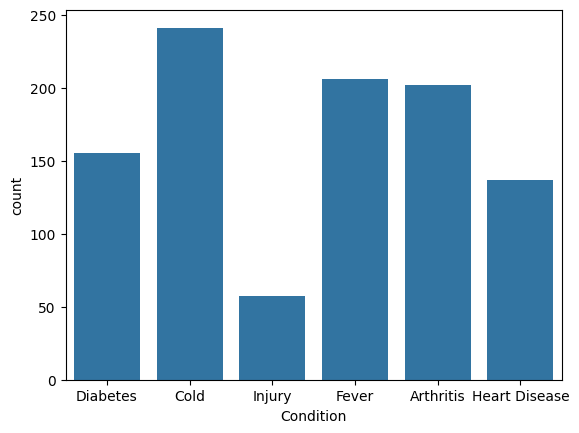

In [ ]:
sns.countplot(x='Condition',data=df)

In [ ]:
df['Condition'].value_counts()

Condition
Cold             241
Fever            206
Arthritis        202
Diabetes         155
Heart Disease    137
Injury            57
Name: count, dtype: int64

***Potential Limitation:*** There are only 57 patients who were injured, which is significantly fewer than the number of patients having other conditions. Therefore, we have chosen *not to consider any insights coming from the injured patients, as they would be quite insignificant*

<Axes: xlabel='Condition', ylabel='Age'>

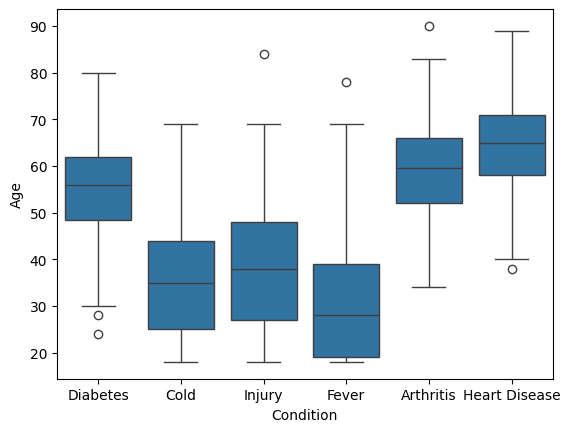

In [ ]:
sns.boxplot(x='Condition',y='Age',data=df)

In [ ]:
old_patients['Condition'].value_counts()

Condition
Heart Disease    96
Arthritis        94
Diabetes         49
Cold              9
Fever             6
Injury            2
Name: count, dtype: int64

Initially, we can observe that diabetes, arthritis and heart disease patients are relatively older than the other conditions' patients (cold, injury, fever)

We will validate this insight using t-tests:

In [ ]:
#Separating the conditions of interest into 2 groups
conds1 = ['Diabetes','Arthritis','Heart Disease']
conds2 = ['Cold','Injury','Fever']

sample1 = df[df['Condition'].isin(conds1)] #Observations for Diabetes, Arthritis, Heart Disease
sample2 = df[df['Condition'].isin(conds2)] #Observations for Cold, Injury, Fever

(sample1.shape, sample2.shape)

((494, 9), (504, 9))

Both samples are almost equal in observations

In [ ]:
from scipy.stats import ttest_1samp #Function from scipy.stats that calculates a T-test for the mean of a group of scores
mean_age = summary['Age']['mean'] #Extracting the mean from the descriptive statistics ('summary') table
t_statistic, p_value = ttest_1samp(sample1['Age'], mean_age) #Running the t-test with 'conds1' as the sub-group
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 26.236125902920598
P-Value: 1.3146910250665712e-95


In [ ]:
from scipy.stats import ttest_1samp
mean_age = summary['Age']['mean']
t_statistic, p_value = ttest_1samp(sample2['Age'], mean_age) #Running the t-test with 'conds2' as the sub-group
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -21.47364112157511
P-Value: 4.424406255783979e-73


The very small p-values in both tests validate that the diabetes, arthritis, and heart disease patients are relatively old, whereas the cold, fever, and injury patients are relatively young

## Age

<Axes: xlabel='Age', ylabel='Count'>

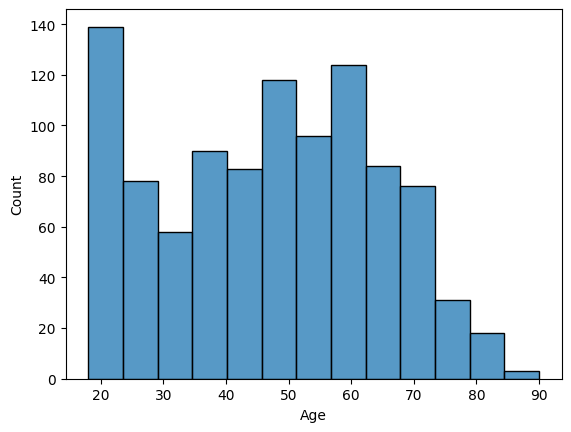

In [ ]:
sns.histplot(x='Age',data=df) #Visualizing the age distribution

A relatively young population, but also quite concentrated in the middle ages

## Recovery Time

<Axes: xlabel='RecoveryTime'>

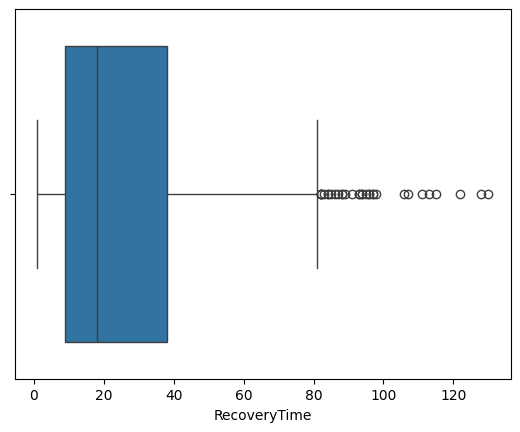

In [ ]:
sns.boxplot(x='RecoveryTime',data=df) #Visualizing the recovery time distribution

In [ ]:
upper_limit = summary['RecoveryTime']['75%'] + 1.5*(summary['RecoveryTime']['75%']-summary['RecoveryTime']['25%'])
upper_limit

81.5

Patients taking longer than 81.5 days to recover are considered outliers according to the boxplot

**However, we have chosen not to consider these values as outliers, as one of our hypotheses is that the patient's condition influences their recovery time, therefore some conditions may naturally have higher recovery time**

#**RESULTS**

In the following sections, we will state our hypotheses and either accept or reject them

## 1. Demographic Factors Hypotheses

### 1.1 The patient's age has an effect on their recovery time

We observed during our exploratory data analysis that a patient's age was associated with the types of conditions they pick up. Combining this insight with the insight that a patient's condition has an effect on their recovery time, we will explore whether or not a patient's age

<Axes: xlabel='Age', ylabel='RecoveryTime'>

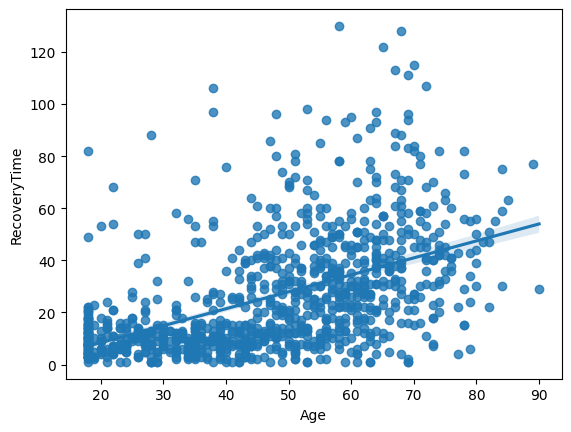

In [ ]:
sns.regplot(x='Age',y='RecoveryTime',data=df)

In [ ]:
correlations['Age']['RecoveryTime']

0.5081922391262127

According to the correlation coefficient of 0.508 between Age and Recovery Time, there appears to be a positive relationship between these two variables, whereby older patients take longer to recover

In [ ]:
(old_patients.describe()['RecoveryTime']['mean'], summary['RecoveryTime']['mean'])

(41.51953125, 25.849699398797597)

Additionally, the mean recovery time for the 'old patients' is 41.5, whereas the mean recovery time for the whole data set is 25.8. At glance, this is a significant difference.

To ensure its significance, we will run a t-test:

In [ ]:
mean_rec_time = summary['RecoveryTime']['mean']
mean_rec_time
t_statistic, p_value = ttest_1samp(old_patients['RecoveryTime'], mean_rec_time)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 10.287942141630907
P-Value: 5.452255803547119e-21


A p-value < 0.05 verifies this insight

We can now state that a patient's age indeed does affect their recovery time

**HYPOTHESIS PROVED ✅**

### 1.2 The patient's Gender has an effect on their recovery time

<Axes: xlabel='Gender', ylabel='RecoveryTime'>

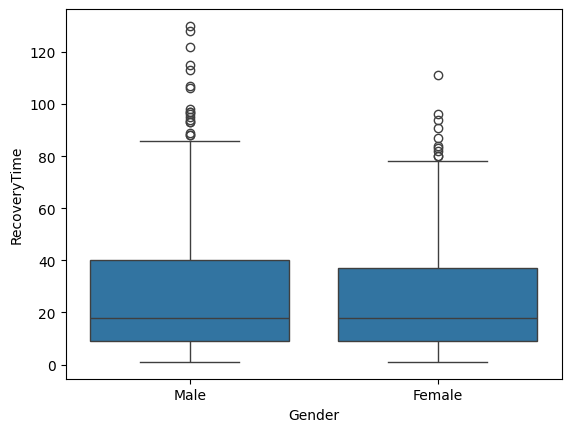

In [ ]:
sns.boxplot(x='Gender',y='RecoveryTime',data=df)

There is no observable impact of gender on recovery time according to this boxplox (quartiles are almost equal)

We can run a t-test to verify this claim:

In [ ]:
from scipy.stats import ttest_1samp
summary = df.describe()
males = df[df['Gender']=='Male']
mean_rec_time = summary['RecoveryTime']['mean']
t_statistic, p_value = ttest_1samp(males['RecoveryTime'], mean_rec_time)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.262018585050192
P-Value: 0.20757067027417506


P-value >0.05, therefore results are not statistically significant

Let's consider the effect of Gender in a different way: What if gender affects the patient's recovery of a certain condition?

<Axes: xlabel='Condition', ylabel='RecoveryTime'>

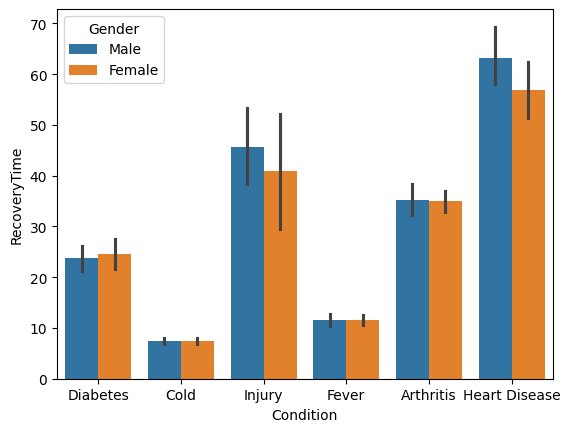

In [ ]:
sns.barplot(x='Condition',y='RecoveryTime',hue='Gender',data=df)

**Gender has no effect on recovery time, error bars overlapping**

Maybe males/females recover better with certain treatments?

<Axes: xlabel='Treatment', ylabel='RecoveryTime'>

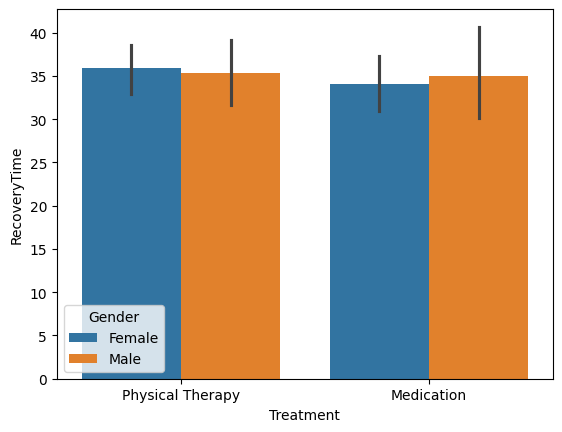

In [ ]:
sns.barplot(x='Treatment',y='RecoveryTime',hue='Gender',data=arthritis_patients)

Both graphs look very similar, no observable effect

*This pattern was observed when comparing the treatments of every condition*

Visualizing this differently:

<Axes: xlabel='Treatment', ylabel='RecoveryTime'>

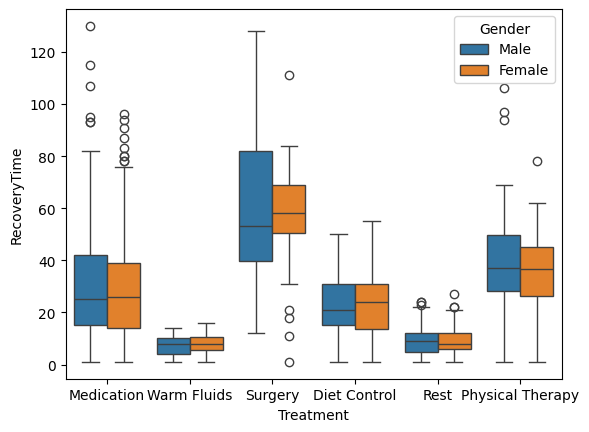

In [ ]:
sns.boxplot(x='Treatment',y='RecoveryTime',hue='Gender',data=df)

Median values are very similar across all conditions with the exception of injury

In [ ]:
surgery_patients = df[df['Treatment']=='Surgery']
male_surgery = surgery_patients[surgery_patients['Gender']=='Male']
mean_rec_time_surgery = surgery_patients.describe()['RecoveryTime']['mean']

t_statistic, p_value = ttest_1samp(male_surgery['RecoveryTime'], mean_rec_time_surgery)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.23203558681852451
P-Value: 0.817438943084744


Highly insignificant, p-value is very large.

After taking multiple steps to find a relationship, we can finally conclude that Gender has **no effect on recovery time**

**HYPOTHESIS REFUTED ❌**

##2. Lifestyle Habits Hypotheses

###2.1 Smoking ONLY impacts the recovery time of patients with heart disease

<Axes: xlabel='Condition', ylabel='RecoveryTime'>

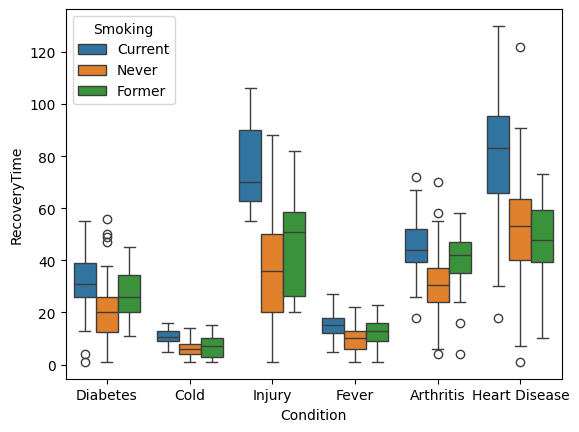

In [ ]:
sns.boxplot(x='Condition',y='RecoveryTime',hue='Smoking',data=df)

Clearly, current smokers take longer to recovery across all conditions, however the most significant results are observed in the arthritis and heart disease patients.

<Axes: xlabel='Smoking', ylabel='RecoveryTime'>

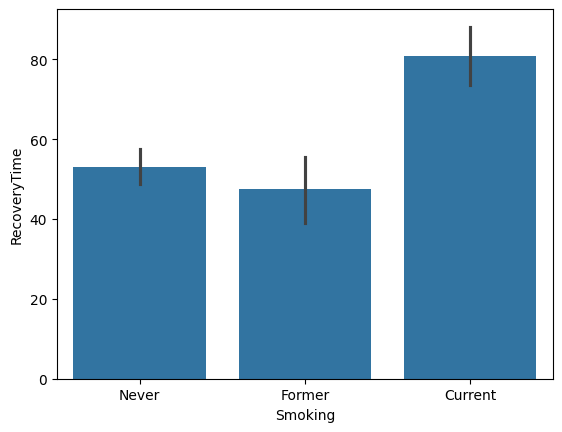

In [ ]:
sns.barplot(x='Smoking',y='RecoveryTime',data=heart_disease_patients)

Current smokers cleraly take longer to recover from heart disease

<Axes: xlabel='Smoking', ylabel='RecoveryTime'>

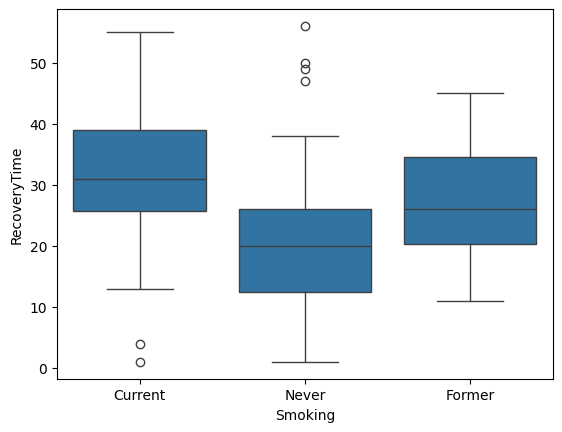

In [ ]:
sns.boxplot(x='Smoking',y='RecoveryTime',data=diabetes_patients)

<Axes: xlabel='Smoking', ylabel='RecoveryTime'>

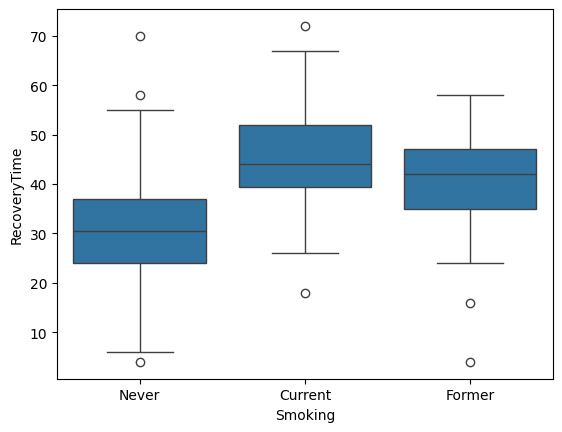

In [ ]:
sns.boxplot(x='Smoking',y='RecoveryTime',data=arthritis_patients)

In [ ]:
from scipy.stats import f_oneway

NeverSmk_diabetes = diabetes_patients[diabetes_patients['Smoking']=='Never']
FormerSmk_diabetes = diabetes_patients[diabetes_patients['Smoking']=='Former']
CurrentSmk_diabetes = diabetes_patients[diabetes_patients['Smoking']=='Current']

f_statistic, p_value = f_oneway(NeverSmk_diabetes['RecoveryTime'],FormerSmk_diabetes['RecoveryTime'],CurrentSmk_diabetes['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 15.93381305608171
P-Value: 5.220501683095396e-07


In [ ]:
from scipy.stats import f_oneway

NeverSmk_arth = arthritis_patients[arthritis_patients['Smoking']=='Never']
FormerSmk_arth = arthritis_patients[arthritis_patients['Smoking']=='Former']
CurrentSmk_arth = arthritis_patients[arthritis_patients['Smoking']=='Current']

f_statistic, p_value = f_oneway(NeverSmk_arth['RecoveryTime'],FormerSmk_arth['RecoveryTime'],CurrentSmk_arth['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 25.600573259681035
P-Value: 1.2767215930315895e-10


In [ ]:
NeverSmk_fever = fever_patients[fever_patients['Smoking']=='Never']
FormerSmk_fever = fever_patients[fever_patients['Smoking']=='Former']
CurrentSmk_fever = fever_patients[fever_patients['Smoking']=='Current']

f_statistic, p_value = f_oneway(NeverSmk_fever['RecoveryTime'],FormerSmk_fever['RecoveryTime'],CurrentSmk_fever['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 20.832522382214965
P-Value: 5.899257253334892e-09


Current smoking habits can also increase the recovery time of patients with diabetes, arthritis, and a fever

Therefore, smoking habits **do not only affect patients with heart disease**

**HYPOTHESIS REFUTED ❌**

### 2.2 Drinking ONLY impacts the recovery time of patients with diabetes


<Axes: xlabel='Condition', ylabel='RecoveryTime'>

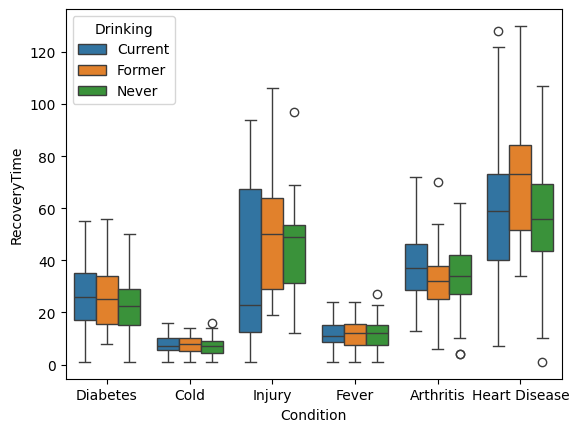

In [ ]:
sns.boxplot(x='Condition',y='RecoveryTime',hue = 'Drinking',data=df)

It appears that former drinkers have a higher recovery time when it comes to recovering from heart disease. This could be explained by the plausible fact that former drinkers have already caused permanent damage to their organs. It is also unclear whether or not drinking habits also affect the recovery time of patients with diabetes

Running the necessary ANOVA tests:

In [ ]:
NeverDrnk_diabetes = diabetes_patients[diabetes_patients['Drinking']=='Never']
FormerDrnk_diabetes = diabetes_patients[diabetes_patients['Drinking']=='Former']
CurrentDrnk_diabetes = diabetes_patients[diabetes_patients['Drinking']=='Current']

f_statistic, p_value = f_oneway(NeverDrnk_diabetes['RecoveryTime'],FormerDrnk_diabetes['RecoveryTime'],CurrentDrnk_diabetes['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 1.9719894661608182
P-Value: 0.1427244044303501


In [ ]:
NeverDrnk_heart_disease = heart_disease_patients[heart_disease_patients['Drinking']=='Never']
FormerDrnk_heart_disease = heart_disease_patients[heart_disease_patients['Drinking']=='Former']
CurrentDrnk_heart_disease = heart_disease_patients[heart_disease_patients['Drinking']=='Current']

f_statistic, p_value = f_oneway(NeverDrnk_heart_disease['RecoveryTime'],FormerDrnk_heart_disease['RecoveryTime'],CurrentDrnk_heart_disease['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 4.874644388882765
P-Value: 0.009045639600739454


Contrary to our hypothesis, there is no significant effect of drinking on the recovery time of patients with diabetes.

However, there indeed is a significant effect on the recovery time of patients with heart disease.

**HYPOTHESIS REFUTED ❌**

### 2.3 Exercise habits ONLY impact the recovery time of patients with heart disease


<Axes: xlabel='Condition', ylabel='RecoveryTime'>

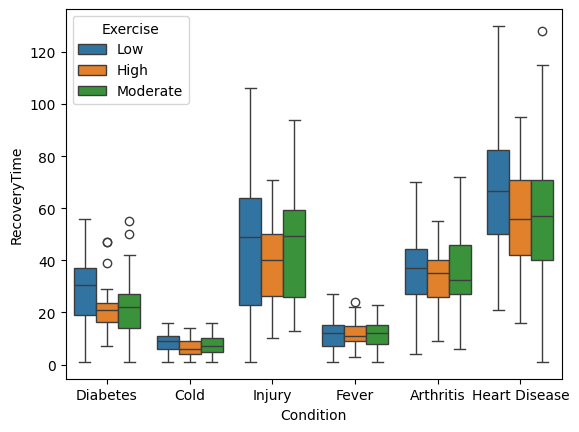

In [ ]:
sns.boxplot(x='Condition',y='RecoveryTime',hue = 'Exercise',data=df)

- Cold and Fever are found to have almost no difference based on how frequently one exercises

- There is a recognizable effect of low exercise leading to a longer recovery time in Heart Disease patients, however, the same can be said for Diabetes patients

We will validate these claims using ANOVA tests:

<Axes: xlabel='Exercise', ylabel='RecoveryTime'>

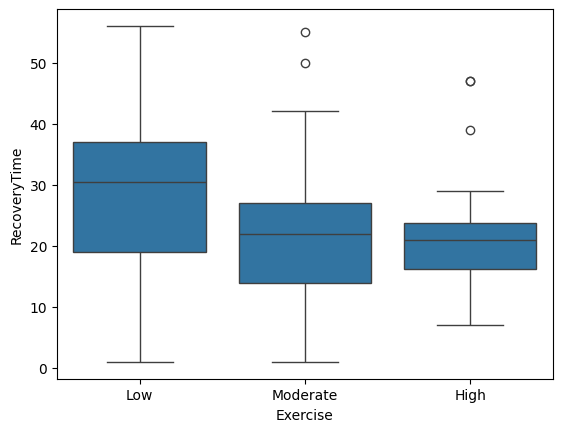

In [ ]:
sns.boxplot(x='Exercise', y = 'RecoveryTime', data = diabetes_patients)

In [ ]:
Low_DB = diabetes_patients[diabetes_patients['Exercise'] == 'Low']
Mod_DB = diabetes_patients[diabetes_patients['Exercise'] == 'Moderate']
High_DB = diabetes_patients[diabetes_patients['Exercise'] == 'High']

f_statistic, p_value = f_oneway(Low_DB['RecoveryTime'],Mod_DB['RecoveryTime'],High_DB['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 7.846276794258185
P-Value: 0.0005715648939759501



The ANOVA test showed the statistical significance of the difference between exercise frequency in Diabtetes patients' recovery times, which we did not initially predict would be impacted.

<Axes: xlabel='Exercise', ylabel='RecoveryTime'>

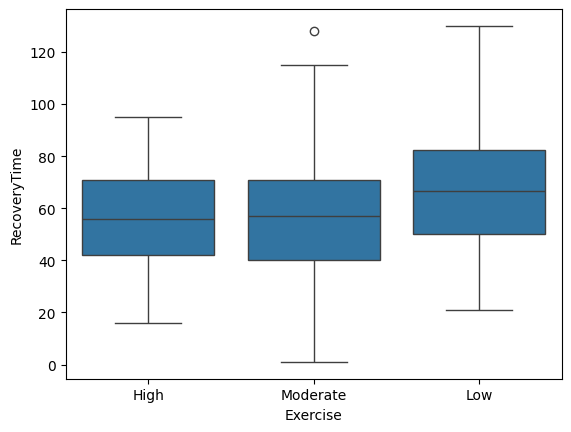

In [ ]:
sns.boxplot(x='Exercise', y = 'RecoveryTime', data = heart_disease_patients)

In [ ]:
Low_HD  = heart_disease_patients[heart_disease_patients['Exercise'] == 'Low']
High_HD = heart_disease_patients[heart_disease_patients['Exercise'] == 'High']
Mod_HD  = heart_disease_patients[heart_disease_patients['Exercise'] == 'Moderate']


f_statistic, p_value = f_oneway(Low_HD['RecoveryTime'],Mod_HD['RecoveryTime'],High_HD['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 2.4986201567838346
P-Value: 0.08602161292060942


The results of the ANOVA test showed the P-Value to be 0.08 which is only marginally significant. However, logically, and based on the boxplot, Low Exercise showed higher recovery time than moderate and high, which may be due to the fact that poeple who usually exercise have better heart muscles.

Therefore, we were wrong about a statistically significant effect of exercise habits on Heart Disease patients' recovery time, and did not expect a statistically significant effect of exercise habits on Diabetes patients, instead.

**HYPOTHESIS REFUTED ❌**

## 3. Condition/Treatment Hypotheses

### 3.1 The patient's condition has an effect on their recovery time

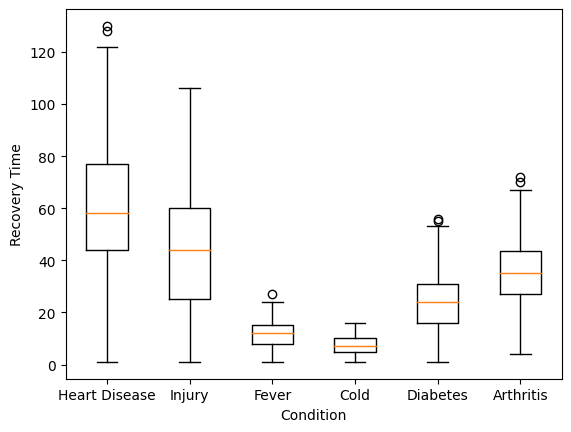

In [ ]:
groups = [heart_disease_patients['RecoveryTime'],injury_patients['RecoveryTime'],fever_patients['RecoveryTime'],cold_patients['RecoveryTime'],diabetes_patients['RecoveryTime'],arthritis_patients['RecoveryTime']]
plt.boxplot(groups)
plt.xticks([1, 2, 3, 4, 5, 6], ['Heart Disease', 'Injury', 'Fever', 'Cold', 'Diabetes', 'Arthritis'])
plt.xlabel('Condition')
plt.ylabel('Recovery Time')
plt.show()

According to the results, there appears to be variability between different conditions' recovery time, meaning a patient's condition could be a factor that affects recovery time.

*We will run an ANOVA test to visualize this:*

In [ ]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(heart_disease_patients['RecoveryTime'],injury_patients['RecoveryTime'],fever_patients['RecoveryTime'],cold_patients['RecoveryTime'],diabetes_patients['RecoveryTime'],arthritis_patients['RecoveryTime'])

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 357.97028175056323
P-Value: 3.272182101459875e-219


This **EXTREMELY SMALL** p-value proves this hypothesis

Logically this makes sense, as different conditions are treated differently, which can result in different recovery times.

**HYPOTHESIS PROVED ✅**

### 3.2 The treatment type has an effect on the patients’ recovery time, but is also dependent on the condition itself.

<Axes: xlabel='Condition', ylabel='RecoveryTime'>

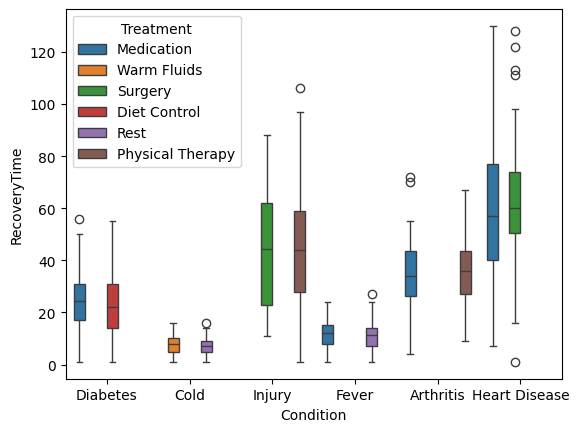

In [ ]:
sns.boxplot(x='Condition',y='RecoveryTime',hue='Treatment',data=df)

Clearly each condition is treated by two distinct treatments

1. **Diabetes:** Medication & Diet Control
2. **Cold:** Warm Fluids & Rest
3. **Injury:** Surgery & Physical Therapy
4. **Fever:** Medication & Rest
5. **Athritis:** Medication & Physical Therapy
6. **Heart Disease:** Medication & Surgery

However, there appears to be no evidence of a particular treatment of a certain condition being more effective than the other for that condition, due to the similar boxplot sizes and variances.

This insight is not clear in the Heart Disease patients, we will run an ANOVA test to make sure:

In [ ]:
f_statistic, p_value = f_oneway(heart_disease_patients['Treatment']=='Medication',heart_disease_patients['Treatment']=='Surgery')

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 1.7649077649077651
P-Value: 0.1851270534490574


A p-value > 0.05 proves that there is no significant difference between the effect of surgery vs medication on Heart Disease patients' recovery time. Therefore, the type of treatment a patient receives does not have a direct effect on their recovery time


**However:**
Recovery time may be dependent on treatment *based on the condition.*
For instance, medication had a totally different recovery time range based on the conditions it treated: Diabetes, Fever, Arthritis, and Heart disease.

**Nonetheless:**
**HYPOTHESIS REJECTED ❌**

# **CONCLUSION**

Going through our hypotheses one-by-one:

---

**1) Demographic Factors:**

✅ 1.1: Age did have an effect on recovery time, as older patients did in fact take longer to recover, on average. This could be explained by the fact that older patients were observed to be concentrated in particular conditions (Heart Disease, Diabetes, Arthritis) which naturally had longer recovery times than Fever and Cold conditions.

❌ 1.2: A patient's gender **did not** have an effect on their recovery time. We based our hypothesis on the thought that hormone discrepancies between the two groups may bring about a disparity in the average recovery time of patients, however this was not the case.

---

**2) Lifestyle Habits:**

❌ 2.1: While current smokers did take longer to recover from heart disease, they also took longer to recover from **other conditions such as Diabetes & Arthritis**. Our weak knowledge of the effects of smoking on conditions such as arthritis led to us only considering heart disease patients to be affected by this habit. Additionally, the ambiguity in what defines 'current' and 'former' smokers made us unable to understand how heavily the habit is/was being practiced.

❌ 2.2: Current drinkers were not . While we gave a plausible explanation for one of the insights in this section, we are not sure of its accuracy due to our lack of knowledge of the effects of alcohol on patients' recovery. As the labels for the 'Drinking' variable were the same as those for smoking, we faced the same issue of not knowing how much 'current' and 'former' drinkers drink and used to drink, respectively.

❌ 2.3: Exercise habits had a ***marginally*** significant effect on Heart Disease patients' recovery time, however these habits did have a significant effect on Diabetes patients' recovery time, which we did not account for in our hypothesis. Similarly, we do not know what constitues 'low', 'moderate' and 'high' exercise, so we could not make full inferences on these results.

***Perhaps our hypotheses were not the best choices for this section, however we still came up with some insights**

---

**3) Condition/Treatment:**

✅ 3.1: A patient's condition did have a significant effect on their recovery time. Since naturally, different conditions have different recovery processes.

❌ 3.2: A reason for 3.1 is that different treatments do not necessarily take the same time for a patient to fully recover, therefore the treatment type must have played a role in determining recovery time. However, there was no evidence of a **direct relationship** between treatment type and recovery time as different treatment types used on patients of a particular condition yielded similar recovery times across all conditions. It is the condition, rather, which *determines what treatment is used*, which could *indirectly affect* a patient's recovery time.